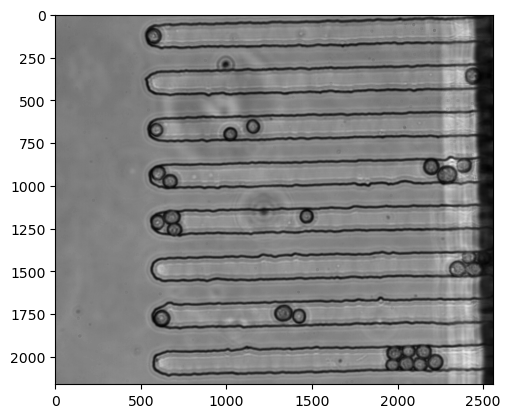

In [1]:
import tifffile 
import matplotlib.pyplot as plt

# Replace 'your_file.tif' with the actual file path
tiff_data = tifffile.imread("C:/Users/micha/Desktop/Master_Project/tiff_file_converted.tiff")
tiff_data_zero = tiff_data[0]  # Assuming you want the first channel



# Display the TIFF image
plt.imshow(tiff_data_zero, cmap='gray')
plt.show()
